#DATASCI W261: Machine Learning at Scale 
## Week 11, Homework 10
##Katrina Adams  
__kradams@ischool.berkeley.edu__  
__17 November 2015__

---

__Start Spark__

In [1]:
%cd ~/Documents/W261/hw10/

/Users/davidadams/Documents/W261/hw10


In [3]:
import os
import sys

spark_home = os.environ['SPARK_HOME'] = \
   '/Users/davidadams/packages/spark-1.5.1-bin-hadoop2.6/'

if not spark_home:
    raise ValueError('SPARK_HOME enviroment variable is not set')
sys.path.insert(0,os.path.join(spark_home,'python'))
sys.path.insert(0,os.path.join(spark_home,'python/lib/py4j-0.8.2.1-src.zip'))
execfile(os.path.join(spark_home,'python/pyspark/shell.py'))

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 1.5.1
      /_/

Using Python version 2.7.6 (default, Sep  9 2014 15:04:36)
SparkContext available as sc, HiveContext available as sqlContext.


--------

__HW 10.0: Short answer questions__

What is Apache Spark and how is it different to Apache Hadoop? 

Fill in the blanks:
Spark API consists of interfaces to develop applications based on it in Java, ...... languages (list languages). 

Using Spark, resource management can be done either in a single server instance or using a framework such as Mesos or ????? in a distributed manner.

What is an RDD and show a fun example of creating one and bringing the first element back to the driver program.

What is lazy evaluation and give an intuitoive example of lazy evaluation and comment on the massive computational savings to be had from lazy evaluation.

__Answers__  
Apache Spark is a framework for parallel computations over big data with optimized genaral execution graphs over RDDs. It differs from Apache Hadoop by storing data in-memory instead of writing to disk so it is much faster. Spark also required 2-5 time less code than Hadoop. With Spark you can do read-eval-print loop, while Hadoop cannot.  

Spark API consists of interfaces to develop applications based on it in Java, <font color='green'>Scala, Python, and R</font> languages.  

Using Spark, resource management can be done either in a single server instance or using a framework such as Mesos or <font color='green'>YARN</font> in a distributed manner.  

A Resilient distributed data set (RDD) is a distributed collection of elements, which are automatically distributed across the cluster for parallel computations. RDDs can also be recomputed from the execution graph providing fault tolerance.  

Lazy evaluation means that transformations are not computed immediately, but only when an action is performed on the trandformed RDD. An example of lazy evaluation is reading the first line of a file. If creation of an RDD from a text file were not computed lazily, then the entire file would be read when the RDD was created. However, with laxy evaluation, if we then perform an action of examining the first line, only the first line needs to be read. Lazy evaluation means that values are only computed if they are required, potentially resulting in significant computational savings.

In [110]:
''' Example of creating an RDD and bringing the first element back to the driver'''
import numpy as np

dataRDD = sc.parallelize(np.random.random_sample(1000))   
data2X= dataRDD.map(lambda x: x*2)
dataGreaterThan1 = data2X.filter(lambda x: x > 1.0)
print dataGreaterThan1.take(1)


[1.3881815116646858]


---

__HW 10.1: __
In Spark write the code to count how often each word appears in a text document (or set of documents). Please use this homework document as a the example document to run an experiment.  
Report the following: provide a sorted list of tokens in decreasing order of frequency of occurence.


In [154]:
def hw10_1():
    # create RDD from text file and split at spaces to get words
    rdd = sc.textFile("HW10-Public/MIDS-MLS-HW-10.txt")
    words = rdd.flatMap(lambda x: x.strip().split(" "))
    # count words and sort
    sortedcounts = words.map(lambda x: (x, 1)) \
        .reduceByKey(lambda x, y: x + y) \
        .map(lambda (x,y): (y, x)) \
        .sortByKey(False) \
        .map(lambda (x,y): (y, x))

    for line in mysorted.collect():
        print line
        
    return None

hw10_1()

(89, u'')
(44, u'the')
(23, u'and')
(17, u'of')
(17, u'in')
(11, u'a')
(9, u'code')
(9, u'to')
(8, u'=')
(8, u'data')
(7, u'for')
(7, u'with')
(7, u'is')
(7, u'Using')
(7, u'on')
(6, u'#')
(6, u'===')
(6, u'your')
(6, u'KMeans')
(5, u'from')
(5, u'this')
(5, u'as')
(4, u'What')
(4, u'Sum')
(4, u'Comment')
(4, u'Squared')
(4, u'each')
(4, u'linear')
(4, u'HW')
(4, u'Set')
(4, u'==HW')
(4, u'example')
(4, u'clusters')
(3, u'report')
(3, u'words')
(3, u'Spark')
(3, u'+')
(3, u'lazy')
(3, u'100')
(3, u'training')
(3, u'count')
(3, u'following')
(3, u'model')
(3, u'Errors')
(3, u'results')
(3, u'using')
(3, u'Within')
(3, u'===HW')
(3, u'import')
(3, u'after')
(3, u'plot')
(3, u'it')
(3, u'an')
(3, u'regression')
(3, u'document')
(3, u'provided')
(3, u'x')
(2, u'-----------------------')
(2, u'notebook:')
(2, u'plots.')
(2, u'--')
(2, u'iterations')
(2, u'list')
(2, u'run')
(2, u'regression.')
(2, u'Report')
(2, u'evaluation')
(2, u'available')
(2, u'https://www.dropbox.com/s/q85t0ytb9apggn

__HW 10.1.1__
Modify the above word count code to count words that begin with lower case letters (a-z) and report your findings. Again sort the output words in decreasing order of frequency.

In [155]:
def hw10_1_1():
    
    def isloweraz(word):
        '''
            check if the word starts with a lower case letter
        '''
        lowercase = 'abcdefghijklmnopqrstuvwxyz'
        try:
            return word[0] in lowercase
        except IndexError:
            return False

    
    # create RDD from text file
    rdd = sc.textFile("HW10-Public/MIDS-MLS-HW-10.txt")
    
    # get words and filter for those that start with a lowercase letter
    words = rdd.flatMap(lambda x: x.strip().split(" ")) \
        .filter(isloweraz)

    # count words and sort
    sortedcounts = words.map(lambda x: (x, 1)) \
        .reduceByKey(lambda x, y: x + y) \
        .map(lambda (x,y): (y, x)) \
        .sortByKey(False) \
        .map(lambda (x,y): (y, x))

    for line in sortedcounts.collect():
        print line
        
    return None

hw10_1_1()


(u'the', 44)
(u'and', 23)
(u'of', 17)
(u'in', 17)
(u'a', 11)
(u'code', 9)
(u'to', 9)
(u'data', 8)
(u'for', 7)
(u'with', 7)
(u'is', 7)
(u'on', 7)
(u'your', 6)
(u'from', 5)
(u'this', 5)
(u'as', 5)
(u'clusters', 4)
(u'each', 4)
(u'linear', 4)
(u'example', 4)
(u'count', 3)
(u'words', 3)
(u'report', 3)
(u'lazy', 3)
(u'following', 3)
(u'training', 3)
(u'model', 3)
(u'results', 3)
(u'using', 3)
(u'import', 3)
(u'plot', 3)
(u'it', 3)
(u'an', 3)
(u'regression', 3)
(u'document', 3)
(u'provided', 3)
(u'after', 3)
(u'x', 3)
(u'notebook:', 2)
(u'list', 2)
(u'run', 2)
(u'regression.', 2)
(u'evaluation', 2)
(u'available', 2)
(u'https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0', 2)
(u'here', 2)
(u'iterations', 2)
(u'word', 2)
(u'set.', 2)
(u'clusters.', 2)
(u'plots.', 2)
(u'findings.', 2)
(u'found', 2)
(u'set', 2)
(u'testing', 2)
(u'iterations,', 2)
(u'between', 2)
(u'be', 2)
(u'or', 2)
(u'one', 2)
(u'that', 2)
(u'differences', 2)
(u'up', 2)
(u'vector', 2)
(u'kmeans_data.txt', 2)
(u'any'

---------------------------------------------------------------

__HW 10.2: KMeans a la MLLib__  
Using the MLlib-centric KMeans code snippet below

NOTE: kmeans_data.txt is available here https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 

Run this code snippet and list the clusters that your find and compute the Within Set Sum of Squared Errors for the found clusters. Comment on your findings.

In [75]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

# Load and parse the data
# NOTE  kmeans_data.txt is available here https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 
data = sc.textFile("HW10-Public/kmeans_data.txt")
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))



# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 2, maxIterations=10,
        runs=10, initializationMode="random")

# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

# Save and load model
clusters.save(sc, "myModelPath")
sameModel = KMeansModel.load(sc, "myModelPath")



Within Set Sum of Squared Error = 0.692820323028


In [58]:
for i,ctr in enumerate(clusters.centers):
    print("Cluster %i: %.1f, %.1f, %.1f" % (i, ctr[0],ctr[1],ctr[2]))

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

Cluster 0: 0.1, 0.1, 0.1
Cluster 1: 9.1, 9.1, 9.1
Within Set Sum of Squared Error = 0.692820323028


---

__HW 10.3:__  
Download the following KMeans notebook:  
https://www.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb?dl=0  

Generate 3 clusters with 100 (one hundred) data points per cluster (using the code provided). Plot the data.  
Then run MLlib's Kmean implementation on this data and report your results as follows:  

  -- plot the resulting clusters after 1 iteration, 10 iterations, after 20 iterations, after 100 iterations.  
  -- in each plot please report the Within Set Sum of Squared Errors for the found clusters. Comment on the progress of this measure as the KMEans algorithms runs for more iterations

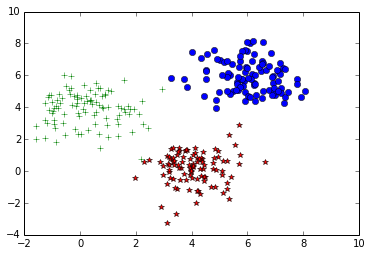

In [59]:
%matplotlib inline
import numpy as np
import pylab 
import json
size1 = size2 = size3 = 100
samples1 = np.random.multivariate_normal([4, 0], [[1, 0],[0, 1]], size1)
data = samples1
samples2 = np.random.multivariate_normal([6, 6], [[1, 0],[0, 1]], size2)
data = np.append(data,samples2, axis=0)
samples3 = np.random.multivariate_normal([0, 4], [[1, 0],[0, 1]], size3)
data = np.append(data,samples3, axis=0)
# Randomlize data
data = data[np.random.permutation(size1+size2+size3),]
np.savetxt('data.csv',data,delimiter = ',')

pylab.plot(samples1[:, 0], samples1[:, 1],'*', color = 'red')
pylab.plot(samples2[:, 0], samples2[:, 1],'o',color = 'blue')
pylab.plot(samples3[:, 0], samples3[:, 1],'+',color = 'green')
pylab.show()

In [91]:
'''
Then run MLlib's Kmean implementation on this data 
and report your results as follows:
-- plot the resulting clusters after 1, 10, 20, and 100 iterations
-- in each plot please report the Within Set Sum of Squared Errors 
for the found clusters. Comment on the progress of this measure as 
the KMeans algorithms runs for more iterations
'''


from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

# Load and parse the data
data = sc.textFile("data.csv")
parsedData = data.map(lambda line: array([float(x) for x in line.split(',')]))


In [97]:
import numpy as np

#Calculate which class each data point belongs to
def nearest_centroid(line):
    x = np.array([float(f) for f in line.split(',')])
    closest_centroid_idx = np.sum((x - centroids)**2, axis=1).argmin()
    return (closest_centroid_idx,(x,1))

#plot centroids and data points for each iteration
def plot_iteration(means):
    pylab.plot(samples1[:, 0], samples1[:, 1], '.', color = 'blue')
    pylab.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue')
    pylab.plot(samples3[:, 0], samples3[:, 1],'.', color = 'blue')
    pylab.plot(means[0][0], means[0][1],'*',markersize =10,color = 'red')
    pylab.plot(means[1][0], means[1][1],'*',markersize =10,color = 'red')
    pylab.plot(means[2][0], means[2][1],'*',markersize =10,color = 'red')
    pylab.show()

Centroids after 1 iteration:
[ 5.01971659 -0.44755959]
[ 1.73271973  2.29390467]
[ 5.92760705  5.7966386 ]
Within Set Sum of Squared Error = 525.673523269


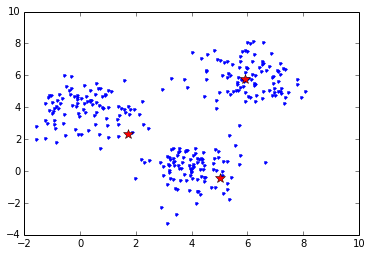

Centroids after 10 iterations:
[ 6.41257066  5.05983697]
[ 2.09780762  2.01964046]
[ 5.51496769  6.73541106]
Within Set Sum of Squared Error = 665.263827732


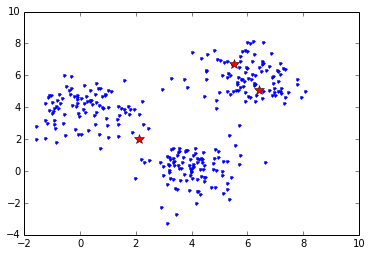

Centroids after 20 iterations:
[ 4.019853    0.15172955]
[ 0.2435185   3.92614601]
[ 6.04647796  5.89393637]
Within Set Sum of Squared Error = 365.942488955


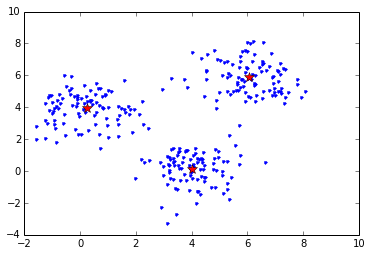

Centroids after 100 iterations:
[ 6.04647796  5.89393637]
[ 0.2435185   3.92614601]
[ 4.019853    0.15172955]
Within Set Sum of Squared Error = 365.942488955


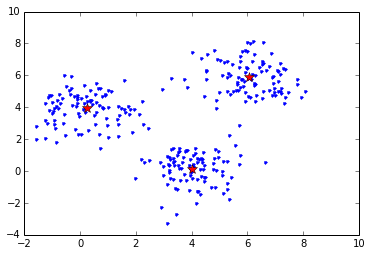

In [112]:
from time import time

numIters = [1, 10, 20, 100]

for i in numIters:
    clusters = KMeans.train(parsedData, k=3, maxIterations=i,
                        initializationMode = "random")
    if i==1:
        print("Centroids after %d iteration:" % i)
    else:
        print("Centroids after %d iterations:" % i)
    for centroid in clusters.centers:
        print centroid
    WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    print("Within Set Sum of Squared Error = " + str(WSSSE))
    plot_iteration(clusters.centers)
    


The WSSE decreases with the number of iterations from 1 to 20 iterations. After 20 iterations, the centroids converge and the WSSE is stable.

---

__HW 10.4:__
Using the KMeans code (homegrown code) provided repeat the experiments in HW10.3. Comment on any differences between the results in HW10.3 and HW10.4. Explain.


Centroids after 1 iteration:
[[ 0.38440545  4.4110655 ]
 [ 6.01586934  5.63927381]
 [ 2.99833688  0.6767298 ]]
Within Set Sum of Squared Error = 408.002683254


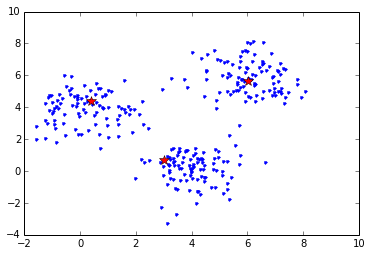

Centroids after 10 iterations:
[[ 0.2435185   3.92614601]
 [ 6.04647796  5.89393637]
 [ 4.019853    0.15172955]]
Within Set Sum of Squared Error = 365.942488955


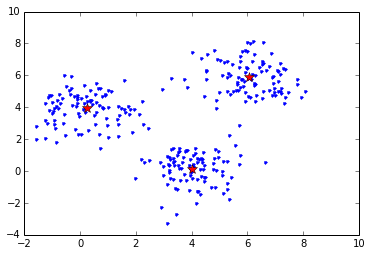

Centroids after 20 iterations:
[[ 4.019853    0.15172955]
 [ 6.04647796  5.89393637]
 [ 0.2435185   3.92614601]]
Within Set Sum of Squared Error = 365.942488955


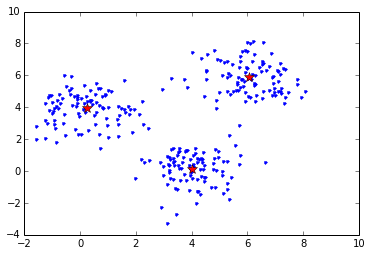

Centroids after 100 iterations:
[[ 4.019853    0.15172955]
 [ 0.2435185   3.92614601]
 [ 6.04647796  5.89393637]]
Within Set Sum of Squared Error = 365.942488955


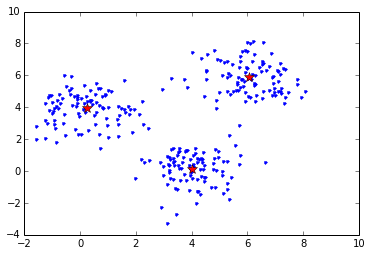

In [153]:
from numpy.random import rand

#Calculate which class each data point belongs to
def nearest_centroid(line):
    x = np.array([float(f) for f in line.split(',')])
    closest_centroid_idx = np.sum((x - centroids)**2, axis=1).argmin()
    return (closest_centroid_idx,(x,1))


def error_p4(line, centroids):
    point = np.array([float(f) for f in line.split(',')])
    closest_centroid_idx = np.sum((point - centroids)**2, axis=1).argmin()
    center = centroids[closest_centroid_idx]
    return sqrt(sum([x**2 for x in (point - center)]))

K = 3

D = sc.textFile("./data.csv").cache()

numIters = [1, 10, 20, 100]

for n in numIters:
    # randomly initialize centroids
    centroids = rand(3,2)*5
    iter_num = 0
    for i in range(n):  
        res = D.map(nearest_centroid).reduceByKey(lambda x,y : (x[0]+y[0],x[1]+y[1])).collect()
        res = sorted(res,key = lambda x : x[0])  #sort based on cluster ID
        centroids_new = np.array([x[1][0]/x[1][1] for x in res])  #divide by cluster size
        if np.sum(np.absolute(centroids_new-centroids))<0.01:
            break
        iter_num = iter_num + 1 
        centroids = centroids_new
    
    if n==1:
        print("Centroids after %d iteration:" % n)
    else:
        print("Centroids after %d iterations:" % n)
    print centroids
    
    WSSSE = D.map(lambda line: error_p4(line, centroids)).reduce(lambda x, y: x + y)
    print("Within Set Sum of Squared Error = " + str(WSSSE))
    
    plot_iteration(centroids)
    


These results are very similar to those for problem 10.3 with centroids converging after about 10 iterations to a WSSE of 365.94